In [1]:
from PIL import Image
from PIL.Image import Resampling
import pylibdmtx.pylibdmtx
import albumentations
import numpy as np
import pandas as pd
import os
import glob
import pathlib
import shutil
import matplotlib.pyplot as plt
from skimage import transform
import json
import sys
import datasets

/home/kp/miniconda3/envs/dm-codes/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Save in format and crop

In [78]:
def save_without_metadata(input_dir: str, output_dir: str, formatter: str = "03d"):
    if not os.path.isdir(input_dir):
        raise ValueError(f'Directory {input_dir} does not exist.')
    os.makedirs(output_dir)
    
    already_copied = 0
    found_files = glob.glob(os.path.join(os.path.abspath(input_dir), "**"))
    found_files.sort()
    
    for file in found_files:
        original_image = Image.open(file)
        data_image = list(original_image.getdata())
        image_without_exif = Image.new(original_image.mode, original_image.size)
        image_without_exif.putdata(data_image)
        image_name = f"{{:{formatter}}}".format(already_copied)
        image_without_exif.save(os.path.abspath(output_dir) + "/" + image_name + ".jpg")
        already_copied += 1

    return already_copied

In [54]:
def format_image_json_files(input_dir: str, output_dir: str, formatter: str = "03d"):
    if not os.path.isdir(input_dir):
        raise ValueError(f'Directory {input_dir} does not exist.')
    os.makedirs(output_dir, exist_ok=True)
    
    found_files = glob.glob(os.path.join(os.path.abspath(input_dir), "*"))
    found_files.sort()
        
    file_names = []
    for num, file in enumerate(found_files):
        file_name = pathlib.Path(file).name
        file_suffix = pathlib.Path(file).suffix
        file_names.append(file_name.removesuffix(file_suffix))
        new_name = f"{{:{formatter}}}".format(num)

        if file_suffix.lower() == ".jpg":
            # delete metadata but keep rotation
            image = Image.fromarray(np.array(Image.open(file)))
            image.save(os.path.abspath(output_dir) + "/" + new_name + ".jpg")
        elif file_suffix == ".json":
            # copy to the output directory    
            shutil.copy(file, os.path.abspath(output_dir) + "/" + new_name + ".json")
        
    return file_names

In [55]:
all_image_files = format_image_json_files(input_dir="../photos/original_photos", output_dir="../photos/formated_photo_json")
all_json_files = format_image_json_files(input_dir="../photos/ordered_jsons", output_dir="../photos/formated_photo_json")
print(all_image_files)
print(all_json_files)
assert all_image_files == all_json_files

['IMG_0631', 'IMG_0632', 'IMG_0633', 'IMG_0635', 'IMG_0637', 'IMG_0643', 'IMG_0644', 'IMG_0648', 'IMG_0649', 'IMG_0650', 'IMG_0651', 'IMG_0718', 'IMG_0721', 'IMG_0722', 'IMG_0723', 'IMG_0725', 'IMG_0727', 'IMG_0729', 'IMG_0732', 'IMG_0734', 'IMG_0735', 'IMG_0737', 'IMG_0739', 'IMG_0742', 'IMG_0765', 'IMG_0768', 'IMG_0771', 'IMG_0776', 'IMG_0777', 'IMG_0781', 'IMG_0782', 'IMG_0786', 'IMG_0788', 'IMG_0791', 'IMG_0794', 'IMG_0797', 'IMG_0799', 'IMG_0801', 'IMG_0802', 'IMG_0803', 'IMG_0805', 'IMG_0806', 'IMG_0808', 'IMG_0810', 'IMG_0811', 'IMG_0814', 'IMG_0816', 'IMG_0817', 'IMG_0822', 'IMG_0823', 'IMG_0824', 'IMG_0825', 'IMG_0827', 'IMG_0895', 'IMG_0898', 'IMG_0905', 'IMG_0906', 'IMG_0908', 'IMG_0909', 'IMG_0911', 'IMG_0912', 'IMG_0914', 'IMG_0915', 'IMG_0918', 'IMG_0920', 'IMG_0922', 'IMG_0923', 'IMG_0924', 'IMG_0926', 'IMG_0927', 'IMG_0938', 'IMG_0939', 'IMG_0941', 'IMG_0942', 'IMG_0943', 'IMG_0946', 'IMG_0947', 'IMG_0948', 'IMG_0949', 'IMG_0950', 'IMG_0951', 'IMG_0952', 'IMG_0953', 'IM

In [26]:
# comment out for git
"""
# plot all annotated images to check that all json annotations are correct

file_dir = "../photos/formated_photo_json"
found_images = glob.glob(os.path.join(os.path.abspath(file_dir), "*.jpg"))
found_images.sort()

for image in found_images[:5]:

    dm_code = Image.open(image)
    file_name = pathlib.Path(image).name.removesuffix(".jpg")

    with open(file_dir + "/" + file_name + ".json") as json_file:
        json_data = json.load(json_file)
    tl, tr, br, bl = json_data["tl"], json_data["tr"], json_data["br"], json_data["bl"]
    vertices = np.asarray(list((tl, tr, br, bl)))

    # plot annotations
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(dm_code, cmap=plt.cm.gray)
    # ax.plot(vertices[:, 0], vertices[:, 1], '.r')
    ax.plot(vertices[0, 0], vertices[0, 1], '.r')
    ax.plot(vertices[1, 0], vertices[1, 1], '.b')
    ax.plot(vertices[2, 0], vertices[2, 1], '.g')
    ax.plot(vertices[3, 0], vertices[3, 1], '.y')
    plt.tight_layout()
    plt.show()
"""

'\n# plot all annotated images to check that all json annotations are correct\n\nfile_dir = "../photos/formated_photo_json"\nfound_images = glob.glob(os.path.join(os.path.abspath(file_dir), "*.jpg"))\nfound_images.sort()\n\nfor image in found_images[:5]:\n\n    dm_code = Image.open(image)\n    file_name = pathlib.Path(image).name.removesuffix(".jpg")\n\n    with open(file_dir + "/" + file_name + ".json") as json_file:\n        json_data = json.load(json_file)\n    tl, tr, br, bl = json_data["tl"], json_data["tr"], json_data["br"], json_data["bl"]\n    vertices = np.asarray(list((tl, tr, br, bl)))\n\n    # plot annotations\n    \n    fig, ax = plt.subplots(figsize=(10, 5))\n    ax.imshow(dm_code, cmap=plt.cm.gray)\n    # ax.plot(vertices[:, 0], vertices[:, 1], \'.r\')\n    ax.plot(vertices[0, 0], vertices[0, 1], \'.r\')\n    ax.plot(vertices[1, 0], vertices[1, 1], \'.b\')\n    ax.plot(vertices[2, 0], vertices[2, 1], \'.g\')\n    ax.plot(vertices[3, 0], vertices[3, 1], \'.y\')\n    plt.t

In [56]:
def rename_clean_to_is_clean(directory: str):
    if not os.path.isdir(directory):
        raise ValueError(f'Directory {directory} does not exist.')
    
    found_images = glob.glob(os.path.join(os.path.abspath(directory), "*.jpg"))
    found_images.sort()
    found_jsons = glob.glob(os.path.join(os.path.abspath(directory), "*.json"))
    found_jsons.sort()

    assert len(found_images) == len(found_jsons)

    for i in range(len(found_images)):
        with open(found_jsons[i]) as json_file:
            json_data = json.load(json_file)

        # remove key clean
        is_clean_value = json_data.pop("clean")

        # add key is_clean
        new_record = {"is_clean": is_clean_value}
        json_data.update(new_record)
        with open(found_jsons[i], "w") as json_file:
            json.dump(json_data, json_file, indent=2)
        

In [57]:
rename_clean_to_is_clean(directory="../photos/formated_photo_json")

In [58]:
def add_valid_or_test_split(directory: str):
    if not os.path.isdir(directory):
        raise ValueError(f'Directory {directory} does not exist.')
    
    found_images = glob.glob(os.path.join(os.path.abspath(directory), "*.jpg"))
    found_images.sort()
    found_jsons = glob.glob(os.path.join(os.path.abspath(directory), "*.json"))
    found_jsons.sort()

    assert len(found_images) == len(found_jsons)

    # one third should be valid data, two thirds test data
    split_number = -1

    for i in range(len(found_images)):
        with open(found_jsons[i]) as json_file:
            json_data = json.load(json_file)

        # change split
        if json_data["is_clean"]:
            split_number += 1

        # add key split
        new_record = {"split": "valid" if split_number % 3 == 0 else "test"}
        json_data.update(new_record)
        with open(found_jsons[i], "w") as json_file:
            json.dump(json_data, json_file, indent=2)

In [59]:
add_valid_or_test_split(directory="../photos/formated_photo_json")

In [60]:
def add_text_to_json(
        file_dir: str,
        control_clean_dir: str,
        square_side: int = 200,
        square_padding: int = 25):
    
    if not os.path.isdir(file_dir):
        raise ValueError(f'Directory {file_dir} does not exist.')
    os.makedirs(control_clean_dir)
    
    # find image and json files
    found_images = glob.glob(os.path.join(os.path.abspath(file_dir), "*.jpg"))
    found_images.sort()
    found_jsons = glob.glob(os.path.join(os.path.abspath(file_dir), "*.json"))
    found_jsons.sort()
    assert len(found_images) == len(found_jsons)

    text = ""
    for i in range(len(found_images)):
        # read json file
        with open(found_jsons[i]) as json_file:
            json_data = json.load(json_file)
        vertices = np.asarray((json_data["tl"], json_data["tr"], json_data["br"], json_data["bl"]))
        is_clean = json_data["is_clean"]

        dm_code = Image.open(found_images[i])
        image_name = pathlib.Path(found_images[i]).name.removesuffix(".jpg")      

        # crop image
        unit_square = np.asarray([
            [square_padding, square_padding],
            [square_side + square_padding, square_padding],
            [square_side + square_padding, square_side + square_padding],
            [square_padding, square_side + square_padding]])
        transf = transform.ProjectiveTransform()
        if not transf.estimate(unit_square, vertices): raise Exception("estimate failed")
        cropped_np_image = transform.warp(np.array(dm_code), transf, output_shape=(square_side + square_padding * 2, square_side + square_padding * 2))
        cropped_pil_image = Image.fromarray((cropped_np_image * 255).astype(np.uint8))

        # decode only if is_clean, otherwise text stays the same
        if is_clean:
            cropped_pil_image = cropped_pil_image.convert("L")
            decoded_code = pylibdmtx.pylibdmtx.decode(cropped_pil_image)
            if len(decoded_code) == 0:
                text = ""
                print(f"could not read {image_name}.jpg")
            else:
                try:
                    text = decoded_code[0].data.decode("utf8")

                    # save cropped clean and its reconstruction
                    cropped_pil_image.save(os.path.abspath(control_clean_dir) + "/" + image_name + ".jpg")
                    encoded_back = pylibdmtx.pylibdmtx.encode(text.encode('utf8'))
                    reconstructed_img = Image.frombytes('RGB', (encoded_back.width, encoded_back.height), encoded_back.pixels)
                    reconstructed_img = reconstructed_img.resize(cropped_pil_image.size)
                    reconstructed_img.save(os.path.abspath(control_clean_dir) + "/" + image_name + "_reconstructed.jpg")

                except UnicodeDecodeError:
                    text = ""
                    print(f"could not decode to utf8 {image_name}.jpg")

        # add text to json file
        new_record = {"text": text}
        json_data.update(new_record)
        with open(found_jsons[i], "w") as json_file:
            json.dump(json_data, json_file, indent=2)

In [61]:
add_text_to_json(
    file_dir="../photos/formated_photo_json",
    control_clean_dir="../photos/control_clean_crops")

could not read 032.jpg
could not read 099.jpg
could not read 273.jpg
could not read 279.jpg


In [65]:
def create_valid_test_folders(input_dir: str, output_dir_valid: str, output_dir_test: str):
    if not os.path.isdir(input_dir):
        raise ValueError(f'Directory {input_dir} does not exist.')
    os.makedirs(output_dir_valid)
    os.makedirs(output_dir_test)

    # find image and json files
    found_images = glob.glob(os.path.join(os.path.abspath(input_dir), "*.jpg"))
    found_images.sort()
    found_jsons = glob.glob(os.path.join(os.path.abspath(input_dir), "*.json"))
    found_jsons.sort()
    assert len(found_images) == len(found_jsons)

    for i in range(len(found_images)):
        # read json file
        with open(found_jsons[i]) as json_file:
            json_data = json.load(json_file)
        split = json_data["split"]

        dm_code = Image.open(found_images[i])
        image_name = pathlib.Path(found_images[i]).name.removesuffix(".jpg")
        
        # save image
        if split == "valid":
            output_dir = output_dir_valid
        elif split == "test":
            output_dir = output_dir_test
        else:
            raise ValueError(f'Split {split} is not supported, only valid or test.')
        dm_code.save(os.path.abspath(output_dir) + "/" + image_name + ".jpg")
        # copy corresponding json    
        shutil.copy(found_jsons[i], os.path.abspath(output_dir) + "/" + image_name + ".json")

In [67]:
create_valid_test_folders(input_dir="../photos/formated_photo_json",
    output_dir_valid="../photos/real_valid", output_dir_test="../photos/real_test")

In [63]:
def crop_dm_codes_to_folder(input_dir_images: str, input_dir_jsons: str, output_dir_cropped: str, square_side: int = 200, square_padding: int = 25):
    if not os.path.isdir(input_dir_images):
        raise ValueError(f'Directory {input_dir_images} does not exist.')
    if not os.path.isdir(input_dir_jsons):
        raise ValueError(f'Directory {input_dir_jsons} does not exist.')
    os.makedirs(output_dir_cropped)
    
    found_images = glob.glob(os.path.join(os.path.abspath(input_dir_images), "*.jpg"))
    found_images.sort()
    found_jsons = glob.glob(os.path.join(os.path.abspath(input_dir_jsons), "*.json"))
    found_jsons.sort()

    assert len(found_images) == len(found_jsons)

    for i in range(len(found_images)):
        dm_code = Image.open(found_images[i])
        with open(found_jsons[i]) as json_file:
            json_data = json.load(json_file)
        vertices = np.asarray((json_data["tl"], json_data["tr"], json_data["br"], json_data["bl"]))

        unit_square = np.asarray([
            [square_padding, square_padding],
            [square_side + square_padding, square_padding],
            [square_side + square_padding, square_side + square_padding],
            [square_padding, square_side + square_padding]])
        
        transf = transform.ProjectiveTransform()
        if not transf.estimate(unit_square, vertices): raise Exception("estimate failed")
        cropped_np_image = transform.warp(np.array(dm_code), transf, output_shape=(square_side + square_padding * 2, square_side + square_padding * 2))

        cropped_image = Image.fromarray((cropped_np_image * 255).astype(np.uint8))
        image_name = pathlib.Path(found_images[i]).name
        cropped_image.save(os.path.abspath(output_dir_cropped) + "/" + image_name)

In [64]:
crop_dm_codes_to_folder(
    input_dir_images="../photos/formated_photo_json",
    input_dir_jsons="../photos/formated_photo_json",
    output_dir_cropped="../photos/control_all_cropped"
)

In [74]:
def change_vertices_order(unordered_jsons_dir: str, ordered_jsons_dir: str, output_dir: str):
    if not os.path.isdir(unordered_jsons_dir):
        raise ValueError(f'Directory {unordered_jsons_dir} does not exist.')
    if not os.path.isdir(ordered_jsons_dir):
        raise ValueError(f'Directory {ordered_jsons_dir} does not exist.')
    os.makedirs(output_dir)

    found_unordered_jsons = glob.glob(os.path.join(os.path.abspath(unordered_jsons_dir), "*.json"))
    found_ordered_jsons = glob.glob(os.path.join(os.path.abspath(ordered_jsons_dir), "*.json"))

    # create a dictionary from all ordered jsons
    # key ... tuple of sorted tuple vertices
    # value ... list of vertices 
    ordered_jsons_dict = {}
    for found_json in found_ordered_jsons:
        json_name = pathlib.Path(found_json).name
        with open(found_json) as json_file:
            json_data = json.load(json_file)
        vertices_dict = {k: json_data[k] for k in ["tl", "tr", "br", "bl"]}
        tuple_vertices = tuple(map(tuple, sorted(list(vertices_dict.values()))))
        if tuple_vertices in ordered_jsons_dict:
            raise ValueError(f"The same vertices as for the json {json_name} are already in the dictionary.")
        else:
            ordered_jsons_dict[tuple_vertices] = vertices_dict       

    # check whether the unordered json vertices are in the ordered dict
    # if so, change the unordered vertices to the orderd ones
    for found_json in found_unordered_jsons:
        json_name = pathlib.Path(found_json).name
        with open(found_json) as json_file:
            json_data = json.load(json_file)
        vertices_dict = {k: json_data[k] for k in ["tl", "tr", "br", "bl"]}
        tuple_vertices = tuple(map(tuple, sorted(list(vertices_dict.values()))))
        if tuple_vertices in ordered_jsons_dict:
            ordered_vertices_dict = ordered_jsons_dict[tuple_vertices]
            # update ordered vertices
            json_data.update(ordered_vertices_dict)
            
        with open(os.path.abspath(output_dir) + "/" + json_name, "w") as json_file:
            json.dump(json_data, json_file, indent=2)
    

# Reconstruct images

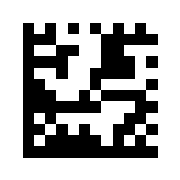

[Decoded(data=b'67772289', rect=Rect(left=22, top=22, width=135, height=134), array=array([[55, 55, 48, 48, 48, 48, 55, 55, 55, 55],
        [48, 48, 55, 55, 48, 48, 55, 55, 48, 48],
        [55, 55, 55, 48, 48, 48, 55, 55, 55, 48],
        [48, 48, 55, 48, 48, 55, 55, 55, 55, 48],
        [55, 48, 48, 48, 48, 55, 48, 48, 48, 48],
        [55, 55, 48, 48, 55, 48, 55, 55, 55, 55],
        [55, 55, 55, 55, 55, 55, 48, 48, 48, 55],
        [48, 55, 48, 48, 48, 48, 48, 48, 55, 55],
        [55, 48, 55, 48, 55, 48, 48, 55, 23, 16],
        [48, 55, 55, 55, 55, 55, 48, 55, 16, 23]], dtype=uint8))]

In [49]:
np_dmc = np.array([
    [0,1,0,1,0,1,0,1,0,1,0,1],
    [0,0,0,1,1,1,1,0,0,0,0,0],
    [0,1,1,0,0,1,1,0,0,1,1,1],
    [0,0,0,0,1,1,1,0,0,0,1,0],
    [0,1,1,0,1,1,0,0,0,0,1,1],
    [0,0,1,1,1,1,0,1,1,1,1,0],
    [0,0,0,1,1,0,1,0,0,0,0,1],
    [0,0,0,0,0,0,0,1,1,1,0,0],
    [0,1,0,1,1,1,1,1,1,0,0,1],
    [0,0,1,0,1,0,1,1,0,0,1,0],
    [0,1,0,0,0,0,0,1,0,1,0,1],
    [0,0,0,0,0,0,0,0,0,0,0,0]
], dtype="uint8")
np_dmc = np_dmc * 255
np_dmc = np.pad(np_dmc, 2, mode='constant', constant_values=255)

img_reconstructed = Image.fromarray(np_dmc, mode="L").resize(size=(180,180), resample=Resampling.NEAREST)
display(img_reconstructed)
pylibdmtx.pylibdmtx.decode(img_reconstructed)

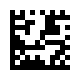

In [53]:
encoded = pylibdmtx.pylibdmtx.encode("67772289".encode('utf8'))
Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)

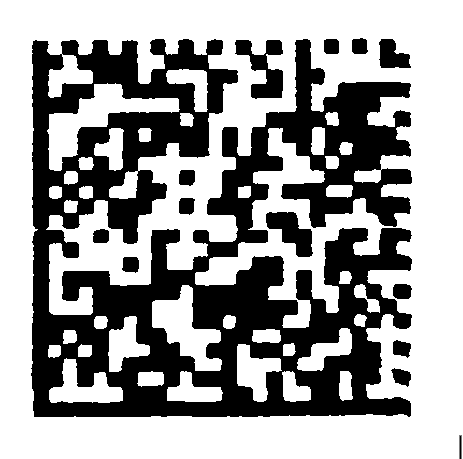

010599700131811921816968741598201725103110F2A01A


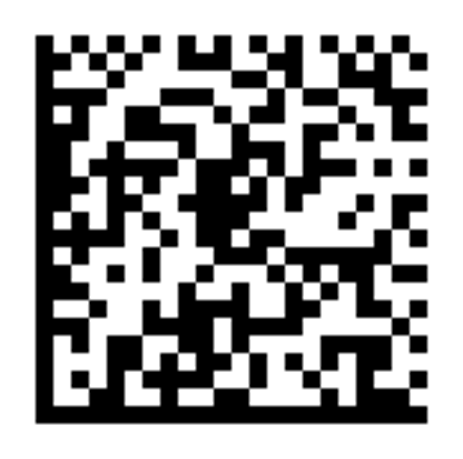

010599700131811921816968741598201725103110F2A01A


In [35]:
dm_code = Image.open(f"../photos/175_clean.png")
display(dm_code)
text = pylibdmtx.pylibdmtx.decode(dm_code)[0].data.decode("utf8")
print(text)

encoded = pylibdmtx.pylibdmtx.encode(text.encode('utf8'))
reconstructed_image = Image.frombytes('RGB', (encoded.width, encoded.height), encoded.pixels)
display(reconstructed_image.resize(dm_code.size))

text_again = pylibdmtx.pylibdmtx.decode(reconstructed_image)[0].data.decode("utf8")
print(text_again)

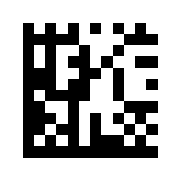

[Decoded(data=b'738020', rect=Rect(left=22, top=22, width=135, height=134), array=array([[55, 55, 55, 55, 48, 48, 48, 48, 55, 55],
        [48, 55, 48, 48, 55, 48, 48, 55, 48, 48],
        [48, 55, 48, 55, 55, 48, 55, 48, 48, 55],
        [55, 55, 48, 48, 55, 55, 48, 55, 48, 48],
        [55, 55, 48, 55, 55, 48, 48, 55, 48, 48],
        [48, 55, 55, 55, 55, 48, 48, 55, 48, 48],
        [55, 48, 48, 55, 48, 48, 48, 48, 55, 55],
        [55, 55, 48, 55, 48, 55, 48, 55, 48, 55],
        [55, 48, 55, 55, 48, 55, 48, 48, 23, 16],
        [48, 55, 48, 55, 48, 55, 55, 55, 16, 23]], dtype=uint8))]

In [5]:
np_030 = np.array([
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
    [0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1],
    [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1],
    [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype="uint8")
np_030 = np_030 * 255
np_030_padded = np.pad(np_030, 2, mode='constant', constant_values=255)

img_reconstructed = Image.fromarray(np_030_padded, mode="L").resize(size=(180,180), resample=Resampling.NEAREST)
display(img_reconstructed)
pylibdmtx.pylibdmtx.decode(img_reconstructed)

In [3]:
def add_dm_border(arr: np.ndarray) -> np.ndarray:
    arr_dm = np.zeros((arr.shape[0] + 2, arr.shape[1] + 2), dtype=arr.dtype)
    arr_dm[1:-1, 1:-1] = arr
    if arr.dtype == np.uint8:
        white = 255
    else:
        white = 1
    arr_dm[0,1::2] = white
    arr_dm[0::2,-1] = white
    return arr_dm

In [ ]:
decoded_img = pylibdmtx.pylibdmtx.decode(img_reconstructed)[0]
dm_array = add_dm_border(decoded_img.array == 48)
dm_array = np.pad(dm_array, 2, mode='constant', constant_values=255)
dm_img = Image.fromarray(dm_array).resize((200, 200), Image.NEAREST).convert('RGB')
dm_img

030


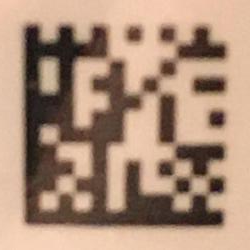

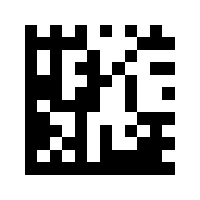

In [5]:
img_name = "030"
print(img_name)
img = Image.open(f"../photos/cropped_clean/{img_name}.jpg")
display(img.rotate(-90))
decoded = pylibdmtx.pylibdmtx.decode(img)[0]
dm_array = add_dm_border(decoded.array == 48)
dm_array = np.pad(dm_array, 2, mode='constant', constant_values=255)
dm_img = Image.fromarray(dm_array).resize((200, 200), Image.NEAREST).convert('RGB')
dm_img

# Prepare for Hugging Face

In [70]:
def create_jsonl(directory: str):
    if not os.path.isdir(directory):
        raise ValueError(f'Directory {directory} does not exist.')

    found_jsons = glob.glob(os.path.join(os.path.abspath(directory), "*.json"))
    found_jsons.sort()
    json_list=[]

    for found_json in found_jsons:
        file_name = pathlib.Path(found_json).name
        file_name = file_name.removesuffix(".json") + ".jpg"
        with open(found_json) as json_file:
            json_data = json.load(json_file)
            new_json_data = {"file_name": file_name, "image_name": file_name}
            json_data.update(new_json_data)
            json_list.append(json_data)

    with open(os.path.join(directory, "metadata.jsonl"), 'w') as output_file:
        for json_data in json_list:
            json.dump(json_data, output_file)
            output_file.write('\n')

In [71]:
create_jsonl(directory = "../photos/real_test")
create_jsonl(directory = "../photos/real_valid")

In [81]:
real_dataset = datasets.load_dataset("imagefolder", data_dir="../datasets/real_dataset")

Resolving data files: 100%|██████████| 200/200 [00:00<00:00, 223101.28it/s]


In [75]:
real_dataset["validation"][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024>,
 'tl': [1632, 1908],
 'tr': [1632, 884],
 'br': [2646, 873],
 'bl': [2652, 1896],
 'is_clean': True,
 'split': 'valid',
 'text': '11505771-01',
 'image_name': '000.jpg'}

In [82]:
real_dataset.push_to_hub("shortery/dm-codes")

Uploading the dataset shards: 100%|██████████| 1/1 [00:24<00:00, 24.82s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/shortery/dm-codes/commit/71cfd9a7053f683c6b8ab625a8c12027da244941', commit_message='Upload dataset', commit_description='', oid='71cfd9a7053f683c6b8ab625a8c12027da244941', pr_url=None, pr_revision=None, pr_num=None)

In [2]:
dataset_from_hf = datasets.load_dataset("shortery/dm-codes")

In [3]:
dataset_from_hf

DatasetDict({
    validation: Dataset({
        features: ['image', 'tl', 'tr', 'br', 'bl', 'is_clean', 'split', 'text', 'image_name'],
        num_rows: 101
    })
    test: Dataset({
        features: ['image', 'tl', 'tr', 'br', 'bl', 'is_clean', 'split', 'text', 'image_name'],
        num_rows: 199
    })
})

In [4]:
def crop_dm_code(example: dict, square_side: int = 200, square_padding: int = 25) -> dict:
    vertices = np.asarray((example["tl"], example["tr"], example["br"], example["bl"]))
    unit_square = np.asarray([
        [square_padding, square_padding],
        [square_side + square_padding, square_padding],
        [square_side + square_padding, square_side + square_padding],
        [square_padding, square_side + square_padding]])
    
    transf = transform.ProjectiveTransform()
    if not transf.estimate(unit_square, vertices): raise Exception("estimate failed")
    cropped_np_image = transform.warp(np.array(example["image"]), transf, output_shape=(square_side + square_padding * 2, square_side + square_padding * 2))
    cropped_image = Image.fromarray((cropped_np_image * 255).astype(np.uint8))
    return {"cropped_image": cropped_image}

In [5]:
dataset_from_hf_foo = dataset_from_hf["validation"].map(crop_dm_code)

Map:   0%|          | 0/101 [00:00<?, ? examples/s]

Map: 100%|██████████| 101/101 [01:00<00:00,  1.68 examples/s]


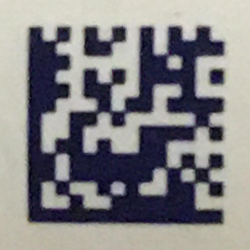

In [13]:
dataset_from_hf_foo[0]["cropped_image"]

# Cropped dataset for Hugging Face

In [2]:
def create_cropped_damaged_dm_codes_with_jsonl(input_dir: str, output_dir_damaged: str, square_side: int = 200, square_padding: int = 25):
    if not os.path.isdir(input_dir):
        raise ValueError(f'Directory {input_dir} does not exist.')
    os.makedirs(output_dir_damaged)
    
    found_images = glob.glob(os.path.join(os.path.abspath(input_dir), "*.jpg"))
    found_images.sort()
    found_jsons = glob.glob(os.path.join(os.path.abspath(input_dir), "*.json"))
    found_jsons.sort()
    json_list=[]

    assert len(found_images) == len(found_jsons)

    for i, found_json in enumerate(found_jsons):
        dm_code = Image.open(found_images[i])
        with open(found_json) as json_file:
            json_data = json.load(json_file)
        vertices = np.asarray((json_data["tl"], json_data["tr"], json_data["br"], json_data["bl"]))

        unit_square = np.asarray([
            [square_padding, square_padding],
            [square_side + square_padding, square_padding],
            [square_side + square_padding, square_side + square_padding],
            [square_padding, square_side + square_padding]])
        
        transf = transform.ProjectiveTransform()
        if not transf.estimate(unit_square, vertices): raise Exception("estimate failed")
        cropped_np_image = transform.warp(np.array(dm_code), transf, output_shape=(square_side + square_padding * 2, square_side + square_padding * 2))
        cropped_image = Image.fromarray((cropped_np_image * 255).astype(np.uint8))

        file_name = pathlib.Path(found_json).name
        file_name = file_name.removesuffix(".json")
        cropped_image.save(os.path.abspath(output_dir_damaged) + "/" + file_name + ".jpg")
        json_data["file_name"] = file_name + ".jpg"
        json_data = {"file_name": json_data["file_name"]} | json_data
        json_data["image_name"] = file_name + ".jpg"
        json_list.append(json_data)

            
    with open(os.path.join(output_dir_damaged, "metadata.jsonl"), 'w') as output_file:
        for json_data in json_list:
            json.dump(json_data, output_file)
            output_file.write('\n')

In [4]:
create_cropped_damaged_dm_codes_with_jsonl(input_dir="../photos/formated_photo_json", output_dir_damaged="../datasets/cropped_real_test_dataset/test")

In [5]:
test_cropped_dataset_from_hf = datasets.load_dataset("shortery/cropped-dm-codes")

Resolving data files: 100%|██████████| 201/201 [00:00<00:00, 677.79it/s]
Generating test split: 200 examples [00:00, 2482.64 examples/s]


In [6]:
test_cropped_dataset_from_hf["test"][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x250>,
 'tl': [1632, 884],
 'tr': [2646, 873],
 'br': [2652, 1896],
 'bl': [1632, 1908],
 'clean': True,
 'text': '11505771-01',
 'image_name': '000.jpg'}